# EE304 - Neuromorphics: Brains in Silicon

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('90cj4NX87Yk', width=720, height=400, loop=1, autoplay=0)

## How does the brain compute?

- We don't know exactly how the brain computes
- However, we know it uses very little power
    - $P_{\rm brain} = 20\rm{W}$
    - $N_{\rm neu} = 10^{11}$ neurons
    - $n_{\rm syn} = 10^4$ synapses/neuron
    - $f_{\rm spk} = 1$ spike/synapse/s
    - $N_{\rm neu}n_{\rm syn}f_{\rm spk} = 10^{15}$ spikes/s
    - $e_{\rm syn} = P_{\rm brain}/(N_{\rm neu}n_{\rm syn}f_{\rm spk}) = 2\times10^{-14}{\rm J}$

## It's energy-budget constrains signal-to-noise ratio

- How many ion-channels, $M_{\rm brain}$, are open?
    - $g_{\rm ionch} = 10^{-11}{\rm S}$
    - $G_{\rm brain} = 20{\rm W}/(0.1{\rm V})^2 = 2\times10^3{\rm S}$ 
    - $M_{\rm brain} = G_{\rm brain}/g_{\rm ionch} = 2\times10^{14}$ ion-channels/brain
- How many, $m_{\rm neu}$, per neuron?
    - $m_{\rm neu} = M_{\rm brain}/N_{\rm neu}=2\times10^3$ ion-channels/neuron
- How many, $m_{\rm syn}$, per synapse?
    - $n_{\rm synon} = n_{\rm syn}f_{\rm spk}t_{\rm on} = 10^4\times1\times10^{-2} = 100$ synapses/neuron
    - $m_{\rm syn} = m_{\rm neu}/n_{\rm synon} = 20$ ion-channels/synapse

<img src=files/lecture2/neuron+synapse.png width=800px>
- The number of ion-channels that are gated open at any time fluctuates
- The signal is the mean number that are open, $\mu$
- The noise is the standard deviation, $\sigma$
- As individual ion-channels open and close independently, $\sigma^2 = \mu$
- Hence, SNR = $\sigma/\mu = \surd{\mu}$
    - At the neuron level, SNR $= \surd{m_{\rm neu}} = \sqrt{2\times10^3}=45$
    - At the synapse level, SNR $= \surd{m_{\rm syn}} = \surd{20}=4.5$

## Another source of variability: Gating

<img src=files/lecture2/ionchannel.png width=600px>
- Ion-channels are noisy switches
    - Thermal fluctuations cause the channel to open at random
        - A few $kT$ ($=4.1\times10^{-21}{\rm J}$ or 25 meV at $25^\circ$) is all it takes
    - Gating--either by ligand or voltage--shifts the probability towards 0 or 1
    - The minimum and maximum probabilities are around 0.1 and 0.9 
- Synapses often fail to release neurotransmitter
    - Failures occur for about two out of every three spikes
    - Probability varies over time (synaptic plasticity)

## Yet another source of variability: Expression

<img src=files/lecture2/ionchannelexpression.pdf width=800px>
- Ion-channels are expressed stochastically [O'Leary et al., 2014] 
    - The expression levels of various types of ion-channels vary a lot from cell to cell
        - If I ask for $\mu$ ion-channels, I get $\mu\pm\sqrt{\mu}$
    - For each cell type, however, the ratios appear to be set precisely  
    - Computational modeling has shown that this is sufficient to get the right phenotype (i.e., behavior) 

## The brain's computational style

<img src=files/lecture2/AnalogDendriteDigitalAxon.png width=600px>

- To be robust to:
    - Heterogeneity: Variatons of ion-channel counts from neuron to neuron and synapse to synapse 
    - Stochasticity: Probabilistic opening of ion-channels in response to ligand or voltage-gating
- The brain combines:
    - Imprecise Analog Computation
    - Unreliable Digital Communication

## The Neural Engineering Framework (NEF)

<img src=files/lecture2/nef_book.png width=600px>

- A method to synthesize interlayer connection weights to perform specified mathematical operations that is:
    - Robust to heterogeneity: Variatons of ion-channel counts from neuron to neuron and synapse to synapse 
    - Tolerant to stochasticity
    - Scalable to millions of neurons connected by billions of synapses
- Synaptic weights are learned off-line by employing three principles:
    - Representation: Encodes ${\bf x}$ in a layer of spiking neurons
    - Transformation: Decodes the layer's spike trains to obtain ${\bf f(x)}$
    - Dynamics: Uses synaptic temporal dynamics to realizes dynamic transformations

## NEF Principle 1 - Representation

- Activity of neurons change over time

<img src=files/lecture2/spikes.jpg width=800px>

## Representation formalism

- Value being represented:  $x$
- Neural activity:  $a$
- Neuron index: $i$

### Encoding and decoding

- Have to define both to define a code
- Lossless code (e.g. Morse Code):
    - encoding: $a = f(x)$
    - decodng: $x = f^{-1}(a)$
- Lossy code:
    - encoding: $a = f(x)$
    - decoding: $\hat{x} = g(a) \approx x$

## Distributed representation

- Not just one neuron per $x$ value
    - Many different $a$ values for a single $x$
- Encoding: $a_i = f_i(x)$
- Decoding: $\hat{x} = g(a_0, a_1, a_2, a_3, ...)$

## Example: binary representation

Encoding (nonlinear):
$$
a_i = \begin{cases}
    1 &\mbox{if } x \mod {2^{i+1}} \ge 2^{i} \\ 
    0 &\mbox{otherwise} 
    \end{cases}
$$

Decoding (linear):
$$
\hat{x} = \sum_i a_i 2^{i-1}
$$

--------------------

Suppose: $x = 13$

Encoding: 
$a_0 = 1$, $a_1 = 0$, $a_2 = 1$, $a_3 = 1$

Decoding:
$\hat{x} = 1*1+0*2+1*4+1*8 = 13$
    

## Linear decoding

- Write decoder as $\hat{x} = \sum_ia_i d_i$

- Linear decoding is nice and simple
    - Works fine with non-linear encoding (!)
    
- The NEF uses linear decoding, but what about the encoding?

## Neuron encoding

$a_i = f_i(x)$ 

- What do we know about neurons?

<img src=files/lecture1/NeuronStructure.jpg>

- Firing rate goes up as total input current goes up
    - $a_i = G_i(J)$
    
- What is $G_i$?
    - depends on how detailed a neuron model we want.
    


In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('hxdPdKbqm_I', width=720, height=400, loop=1, autoplay=0) 

### Rectified Linear Neuron

/opt/anaconda/lib/python2.7/site-packages/IPython/nbformat/current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)
:0: FutureWarning: IPython widgets are experimental and may change in the future.


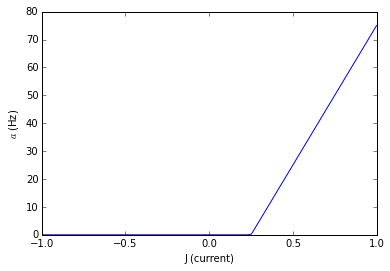

In [3]:
# Rectified linear neuron
import numpy
import nengo
import matplotlib.pyplot as plt
%matplotlib inline

n = nengo.neurons.RectifiedLinear() #n is a Nengo LIF neuron, these are defaults

J = numpy.linspace(-1,1,100)

plt.plot(J, n.rates(J, gain=100, bias=-25))
plt.xlabel('J (current)')
plt.ylabel('$a$ (Hz)');

### Leaky integrate-and-fire neuron

$$
a= \frac{1}{\tau_{ref}-\tau_{RC}\ln(1-\frac{1}{J})}
$$

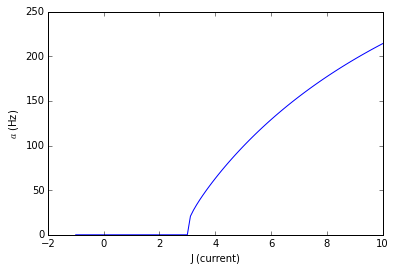

In [4]:
# Leaky integrate and fire
n = nengo.neurons.LIFRate(tau_rc=0.02, tau_ref=0.002) #n is a Nengo LIF neuron, these are defaults

J = numpy.linspace(-1,10,100)

plt.plot(J, n.rates(J, gain=1, bias=-2)) 
plt.xlabel('J (current)')
plt.ylabel('$a$ (Hz)');

### Response functions
- These are called "response functions"
    - How much neural firing changes with change in current
    - Similar for many classes of cells (e.g. pyramidal cells - most of cortex)
    - This is the $G_i$ function in the NEF, can be pretty much anything
    
## Tuning Curves
- Neurons seem to be sensitive to particular values of $x$
    - How are neurons 'tuned' to a representation?  or...
    
- What's the mapping between $x$ and $a$?
    - Consider eye position and arm movements

<img src="files/lecture2/horizontal_eye.jpg">

<img src="files/lecture2/armmovement1.jpg">

<img src="files/lecture2/armtuningcurve.png">


- Is there a general form?

### Tuning curves (cont.)
- The NEF suggests that there is...
    - Something generic and simple
    - That covers all the above cases (and more)
- Note that they experimenters are graphing $a$, as a function of $x$
    - $x$ is much easier to measure than $J$
    - So, there are two mappings of interest:
        1. $x$->$J$
        2. $J$->$a$ (response function)
    - Together these give the tuning curve
   
- Any ideas?

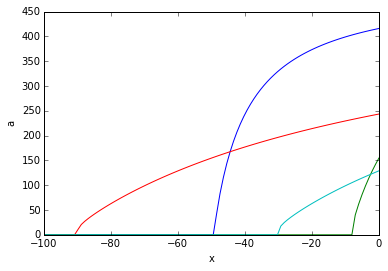

In [5]:
n = nengo.neurons.LIFRate() #n is a Nengo LIF neuron
x = numpy.linspace(-100,0,100)

plt.plot(x, n.rates(x, gain=1, bias=50), 'b') # x*1+50
plt.plot(x, n.rates(x, gain=0.1, bias=10), 'r') # x*0.1+10
plt.plot(x, n.rates(x, gain=0.5, bias=5), 'g') # x*0.05+5
plt.plot(x, n.rates(x, gain=0.1, bias=4), 'c') #x*0.1+4))

plt.xlabel('x')
plt.ylabel('a');

For mapping #1, the NEF uses a linear map:
$ J = \alpha x + J^{bias} $

- But what about type (c) in this graph?

<img src=files/lecture2/tuning_curve.jpg>

- Easy enough:

$ J = - \alpha x + J^{bias} $

- But what about type(b)?  

- There's usually some $x$ which gives a maximum firing rate
    - ...and thus a maximum $J$
- Firing rate (and $J$) decrease as you get farther from the preferred $x$ value
    - So something like $J = \alpha [sim(x, x_{pref})] + J^{bias}$
- What sort of similarity measure?    
- Let's think about $x$ for a moment
    - $x$ can be anything... scalar, vector, etc.
    - Does thinking of it as a vector help?

# The Encoding Equation (i.e. Tuning Curves)

- Here is the general form we use for everything (it has both 'mappings' in it)
- $a_i = G_i[\alpha_i x \cdot e_i + J_i^{bias}] $
    - $\alpha$ is a gain term (constrained to always be positive)
    - $J^{bias}$ is a constant bias term
    - $e$ is the *encoder*, or the *preferred direction vector*
    - $G$ is the neuron model
    - $i$ indexes the neuron
- To simplify life, we always assume $e$ is of unit length
    - Otherwise we could combine $\alpha$ and $e$
- In the 1D case, $e$ is either +1 or -1
- In higher dimensions, what happens?

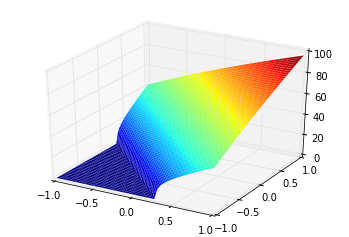

In [6]:
n = nengo.neurons.LIFRate()

e = numpy.array([1.0, 1.0]) 
e = e/numpy.linalg.norm(e)

a = numpy.linspace(-1,1,50)
b = numpy.linspace(-1,1,50)

X,Y = numpy.meshgrid(a, b)

from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
p = ax.plot_surface(X, Y, n.rates((X*e[0]+Y*e[1]), gain=1, bias=1.5), 
                    linewidth=0, cstride=1, rstride=1, cmap=plt.cm.jet)

- But that's not how people normally plot it
- It might not make sense to sample *every possible* x
- Instead they might do some subset
    - For example, what if we just plot the points around the unit circle?

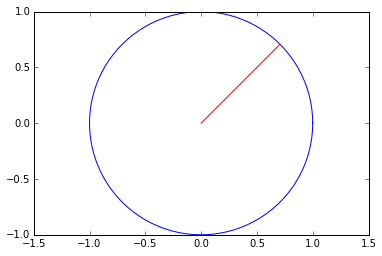

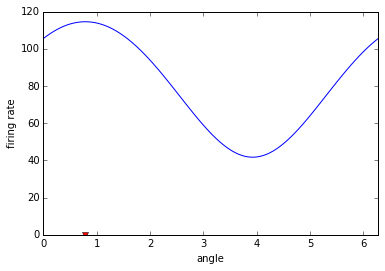

In [7]:
n = nengo.neurons.LIFRate()

theta = numpy.linspace(0, 2*numpy.pi, 100)
x = numpy.array([numpy.cos(theta), numpy.sin(theta)])
plt.plot(x[0],x[1])
plt.axis('equal')

e = numpy.array([1.0, 1.0])
e = e/numpy.linalg.norm(e)

plt.plot([0,e[0]], [0,e[1]],'r')

gain = 1
bias = 2.5

plt.figure()
plt.plot(theta, n.rates(numpy.dot(x.T, e), gain=gain, bias=bias))
plt.plot([numpy.arctan2(e[1],e[0])],0,'rv')
plt.xlabel('angle')
plt.ylabel('firing rate')
plt.xlim(0, 2*numpy.pi);

- That starts looking a lot more like the real data.

## Notation

- Encoding
    - $a_i = G_i(\alpha_i x \cdot e_i + J^{bias}_i)$
    
- Decoding
    - $\hat{x} = \sum_i a_i d_i$
    
- The textbook uses $\phi$ for $d$ and $\tilde \phi$ for $e$
    - We're switching to $d$ (for decoder) and $e$ (for encoder)

Got up to here

Alex's Feedback:
1. I liked the motivational stuff at the beginning. For next year, I still think that some silly cartoon of a system of connected neurons would have been a good preface for those not really familiar with anything "neural". Just a drawing of a few neurons connected on the board to give a feel how all the different components of the system act on each other. Actually the cartoon you had for "neuron encoding" was basically perfect. You should spend like 20 minutes on that picture on the first day.

## Decoder

- But where do we get $d_i$ from?
    - $\hat{x}=\sum a_i d_i$
    
- Find the optimal $d_i$
    - How?
    - Math

## Solving for $d$

- Minimize the average error over all $x$, i.e.,

$ E = \frac{1}{2}\int_{-1}^1 (x-\hat{x})^2 \; dx $

- Substitute for $\hat{x}$:

$ 
\begin{align}
E = \frac{1}{2}\int_{-1}^1 \left(x-\sum_i^N a_i d_i \right)^2 \; dx 
\end{align}
$

- Take the derivative with respect to $d_i$:

$
\begin{align}
{{\partial E} \over {\partial d_i}} &= {1 \over 2} \int_{-1}^1 2 \left[ x-\sum_j a_j d_j \right] (-a_i) \; dx \\
{{\partial E} \over {\partial d_i}} &= - \int_{-1}^1 a_i x \; dx + \int_{-1}^1 \sum_j a_j d_j a_i \; dx 
\end{align}
$

- At the minimum (i.e. smallest error), $ {{\partial E} \over {\partial d_i}} = 0$

$
\begin{align}
\int_{-1}^1 a_i x \; dx &= \int_{-1}^1 \sum_j(a_j d_j a_i) \; dx \\
\int_{-1}^1 a_i x \; dx &= \sum_j \left(\int_{-1}^1 a_i a_j \; dx\right)d_j 
\end{align}
$

- That's a system of $N$ equations and $N$ unknowns
- In fact, we can rewrite this in matrix form
    
$ \Upsilon = \Gamma d $

where

$ 
\begin{align}
\Upsilon_i &= {1 \over 2} \int_{-1}^1 a_i x \;dx\\
\Gamma_{ij} &= {1 \over 2} \int_{-1}^1 a_i a_j \;dx 
\end{align}
$

- Do we have to do the integral over all $x$?
    - Approximate the integral by sampling over $x$
    - $S$ is the number of $x$ values to use ($S$ for samples) 

$ 
\begin{align}
\sum_x a_i x / S &= \sum_j \left(\sum_x a_i a_j /S \right)d_j \\
\Upsilon &= \Gamma d 
\end{align}
$

where

$
\begin{align}
\Upsilon_i &= \sum_x a_i x / S \\
\Gamma_{ij} &= \sum_x a_i a_j / S 
\end{align}
$

- Notice that if $A$ is the matrix of activities (the firing rate for each neuron for each $x$ value), then $\Gamma=A^T A / S$ and $\Upsilon=A^T x / S$

So given 

$ \Upsilon = \Gamma d $

then

$ d = \Gamma^{-1} \Upsilon $

or, equivalently

$ d_i = \sum_j \Gamma^{-1}_{ij} \Upsilon_j $


## Alex's code for intuitive decoder explanation

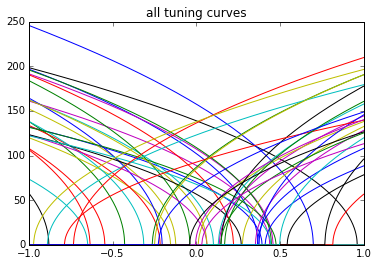

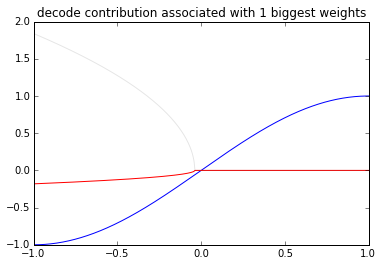

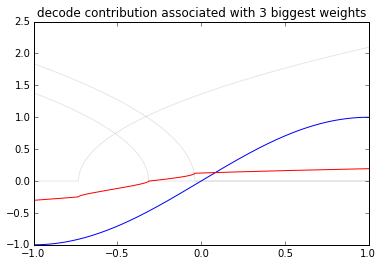

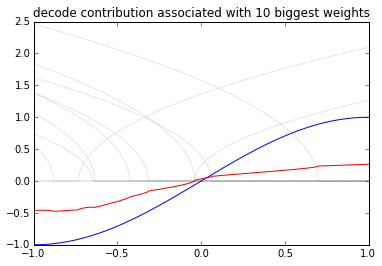

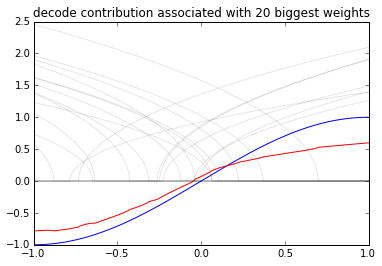

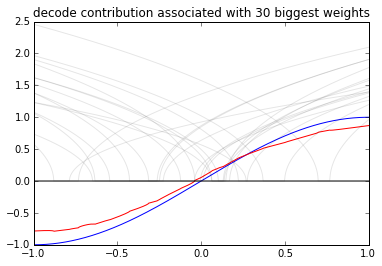

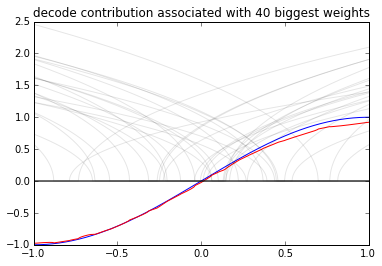

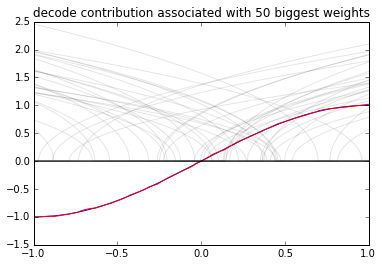

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(123)

bins = 1000
N = 50

# create tuning curves
I = np.zeros((bins, N))
for n in xrange(N):
    I[:, n] = np.linspace(-1, 1, bins)
biases = np.random.rand(N) * 2 - 1
gains = np.random.rand(N) + 1
enc = np.ones((N,))
enc[:N/2] *= -1
I = enc * I + biases
I[I < 0] = 0
# this actually isn't where gain is usually applied
# but we wanted to keep the uniform threshold distribution
# and still have some tuning curve slope variation without
# doing any tricky math
fscale = 100.
A = fscale * gains * np.sqrt(I) 

# add WGN, doesn't really make things more interesting
#A += fscale * .1 * np.random.normal(size=A.shape)

# plot tuning curves
plt.figure()
x = np.linspace(-1, 1, 1000)
plt.plot(x, A)
plt.title('all tuning curves')

# solve decoders
y = np.sin(np.pi/2. * np.linspace(-1, 1, bins))
y = y.reshape((bins, 1))
Ainv = np.linalg.pinv(A, rcond=.01)
d = Ainv.dot(y)

#yhat = A.dot(d)
#plt.figure()
#plt.plot(yhat)

# separate out subsets of n_d decoders and plot result
n_ds = [1, 3, 10, 20, 30, 40, N]
dargs = np.argsort(np.abs(d.flatten()))
for n_d in n_ds:
    dmod = d.copy()
    small_dargs = dargs[:-n_d]
    dmod[small_dargs] = 0
    yhat = A.dot(dmod)
    plt.figure()
    plt.plot(x, y, 'b')
    plt.plot(x, yhat, 'r')
    plt.plot(x, 1/fscale * A[:, dargs[-n_d:]], 'k', alpha=.1)
    plt.title('decode contribution associated with ' + str(n_d) + ' biggest weights')

RMSE 0.0176536785607


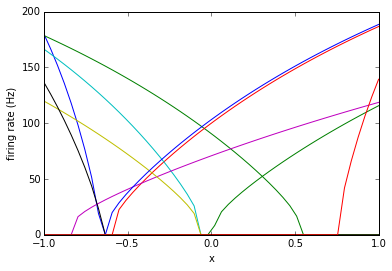

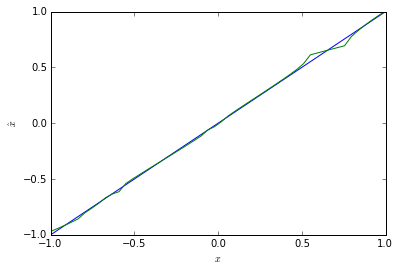

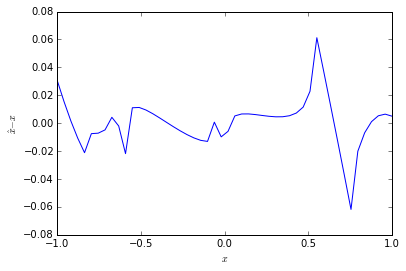

In [8]:
from nengo.utils.ensemble import tuning_curves
from nengo.dists import Uniform

N = 10

model = nengo.Network(label='Neurons')
with model:
    neurons = nengo.Ensemble(N, dimensions=1, 
                             max_rates=Uniform(100,200)) #Defaults to LIF neurons, 
                                        #with random gains and biases for
                                        #neurons between 100-200hz over -1,1

    connection = nengo.Connection(neurons, neurons, #This is just to generate the decoders
                                  solver=nengo.solvers.LstsqL2(reg=0)) #reg=0 means ignore noise
    
sim = nengo.Simulator(model)

d = sim.data[connection].decoders.T

x, A = tuning_curves(neurons, sim)

xhat = numpy.dot(A, d)

plt.plot(x, A)
plt.xlabel('x')
plt.ylabel('firing rate (Hz)')

plt.figure()
plt.plot(x, x)
plt.plot(x, xhat)
plt.xlabel('$x$')
plt.ylabel('$\hat{x}$')
plt.ylim(-1, 1)
plt.xlim(-1, 1)

plt.figure()
plt.plot(x, xhat-x)
plt.xlabel('$x$')
plt.ylabel('$\hat{x}-x$')
plt.xlim(-1, 1)

print 'RMSE', numpy.sqrt(numpy.average((x-xhat)**2))

- What happens to the error with more neurons?

- What if we just increase the number of neurons?  Will it help?